Memory usage of dataframe is 0.20 MB
Memory usage after optimization is: 0.08 MB
Decreased by 60.7%
Memory usage of dataframe is 15.12 MB
Memory usage after optimization is: 3.86 MB
Decreased by 74.4%
Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
Adjusted Close    0
dtype: int64
Date       0
A        111
AA       117
AAPL     114
ABBV    3137
        ... 
YUM      119
ZION     119
ZLC      262
ZMH      265
ZNGA    2890
Length: 544, dtype: int64
Index(['Date', 'A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACE', 'ACI', 'ACN',
       ...
       'XOM', 'XRAY', 'XRX', 'XYL', 'YHOO', 'YUM', 'ZION', 'ZLC', 'ZMH',
       'ZNGA'],
      dtype='object', length=544)


C:\Users\Acer\AppData\Local\Temp\ipykernel_5548\2126207049.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outliers['Ticker'] = ticker
C:\Users\Acer\AppData\Local\Temp\ipykernel_5548\2126207049.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outliers['Ticker'] = ticker
C:\Users\Acer\AppData\Local\Temp\ipykernel_5548\2126207049.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

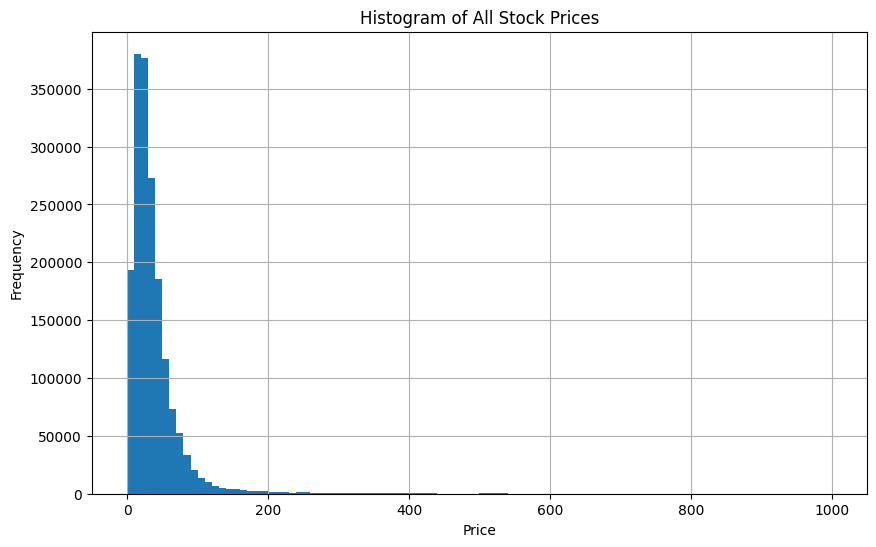

Анализ завершен и результаты сохранены.


In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

import pandas as pd
import matplotlib.pyplot as plt
from memory_reducer import memory_reducer

# Загрузка данных
sp500 = pd.read_csv('../data/sp500.csv')
prices = pd.read_csv('../data/stock_prices.csv')

# Оптимизация памяти
sp500 = memory_reducer(sp500)
prices = memory_reducer(prices)

# Анализ пропущенных значений
print(sp500.isna().sum())
print(prices.isna().sum())

# Проверка имен колонок
print(prices.columns)

# Создание директорий для сохранения результатов
os.makedirs('../results/plots', exist_ok=True)

# Анализ выбросов для каждой акции и создание общей гистограммы
all_outliers = pd.DataFrame()
for ticker in prices.columns[1:]:  # Пропускаем первый столбец 'Date'
    # Добавление выбросов в общий DataFrame
    outliers = prices[(prices[ticker] < 0.1) | (prices[ticker] > 10000)]
    outliers['Ticker'] = ticker
    all_outliers = pd.concat([all_outliers, outliers], ignore_index=True)
    
# Сохранение всех выбросов в один файл
all_outliers.to_csv('../results/outliers.txt', index=False)

# Создание общей гистограммы для всех акций
plt.figure(figsize=(10, 6))
prices.iloc[:, 1:].stack().hist(bins=100, range=(0, 1000))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of All Stock Prices')
plt.savefig('../results/plots/all_prices_histogram.png')
plt.show()

print("Анализ завершен и результаты сохранены.")
